In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [3]:
file_path = 'fraud_analytics_case.csv'  # Replace with your file path
df = pd.read_csv(file_path)

In [4]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f'Value counts for {col}:')
    print(df[col].value_counts())
    print('\n')

Value counts for DISBMONTH:
DISBMONTH
11/30/2023    63497
10/31/2023    51305
6/30/2023     44597
12/31/2023    43415
9/30/2023     42383
7/31/2023     40083
8/31/2023     40042
4/30/2023     37286
5/31/2023     36691
10/31/2022    35954
3/31/2023     31373
1/31/2023     26786
2/28/2023     24775
11/30/2022    24278
12/31/2022    23637
Name: count, dtype: int64


Value counts for CD_SEGMENT:
CD_SEGMENT
MOBILE        312933
Non-Mobile    253169
Name: count, dtype: int64


Value counts for PRODUCT_CODE:
PRODUCT_CODE
MOBILE    312933
FRIDGE    107015
TV         81662
AC         32373
WAM        28947
HT          1038
LAP          512
WPR          435
MWO          417
COOLER       234
TAB          148
TABLET       143
AIR          132
DSW          109
HOBB           2
Name: count, dtype: int64


Value counts for ETC_NTC:
ETC_NTC
NTC    302563
ETC    263539
Name: count, dtype: int64


Value counts for PAYMENT_TYPE:
PAYMENT_TYPE
ADM     270601
ENCH    196352
ACH      99109
UPI         38
Nam

In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [8]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
DISBMONTH                             0
LOAN_NUMBER                           0
CD_SEGMENT                            0
PRODUCT_CODE                          2
ETC_NTC                               0
PAYMENT_TYPE                          2
CUST_PINCODE                          3
CUST_STATE                            0
MANUFACTURE_CODE                      2
TENUR                                 2
ADVANCE_EMI_COUNT                     2
EMI                                   2
LTV                                   2
ASSET_COST                            2
ACTUAL_LOAN_AMOUNT                   13
DOWN_PAYMENT                          2
PAYNIMO_STATUS                    79978
QUALIFICATION                      2983
GENDER                                2
MARITALSTATUS                         2
CUST_AGE                              9
EMP_GRP                               0
MATCH_SCORE                      342479
TOTAL_NO_LV_TRADELINES                0
BUREAU_VI

In [9]:
df = df.dropna()

In [10]:
missing_values_after = df.isnull().sum()
print('Missing values after removal:')
print(missing_values_after)

Missing values after removal:
DISBMONTH                        0
LOAN_NUMBER                      0
CD_SEGMENT                       0
PRODUCT_CODE                     0
ETC_NTC                          0
PAYMENT_TYPE                     0
CUST_PINCODE                     0
CUST_STATE                       0
MANUFACTURE_CODE                 0
TENUR                            0
ADVANCE_EMI_COUNT                0
EMI                              0
LTV                              0
ASSET_COST                       0
ACTUAL_LOAN_AMOUNT               0
DOWN_PAYMENT                     0
PAYNIMO_STATUS                   0
QUALIFICATION                    0
GENDER                           0
MARITALSTATUS                    0
CUST_AGE                         0
EMP_GRP                          0
MATCH_SCORE                      0
TOTAL_NO_LV_TRADELINES           0
BUREAU_VINTAGE_IN_MONTHS         0
NO_TRADELINES_OPENED_LAST_3M     0
TOTAL_NO_LV_CD                   0
TIME_SINCE_FIRST_CD_MONTH

ValueError: num must be an integer with 1 <= num <= 15, not 16

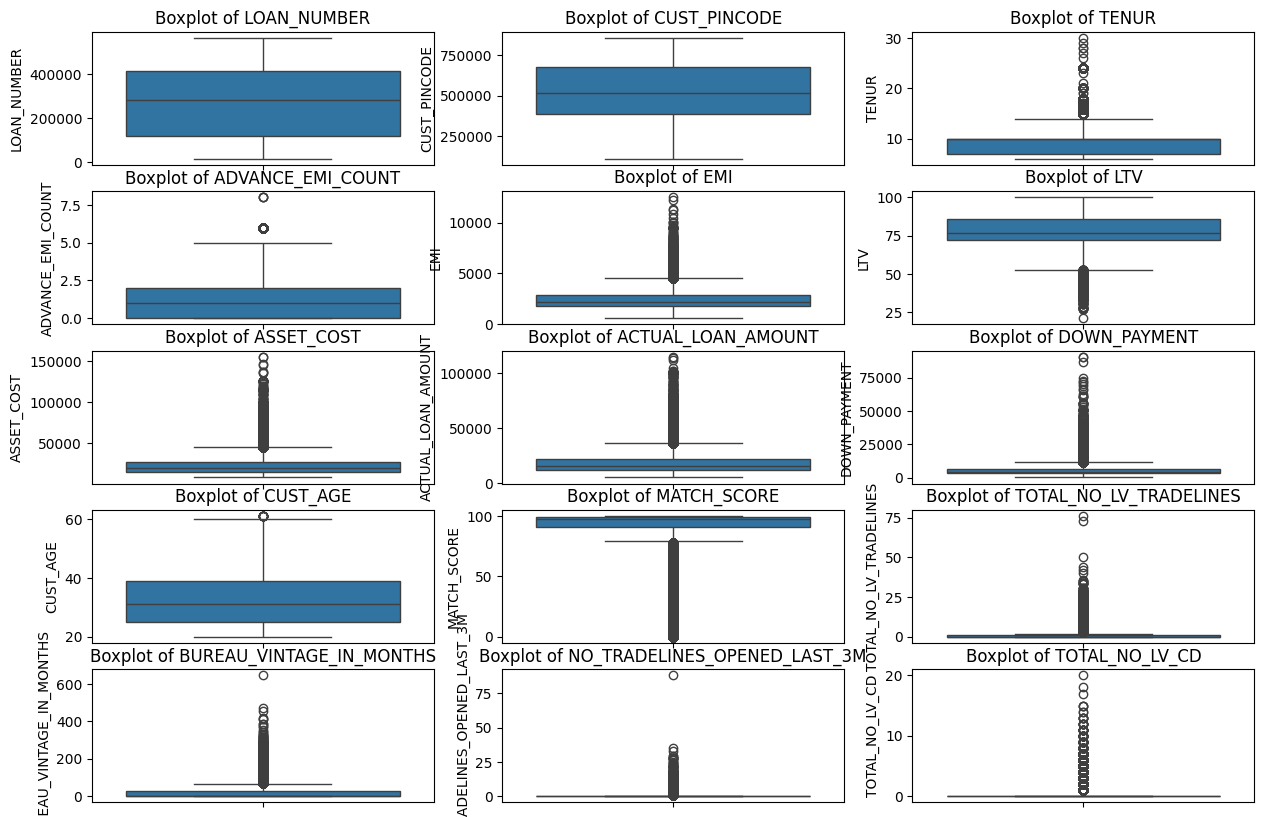

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

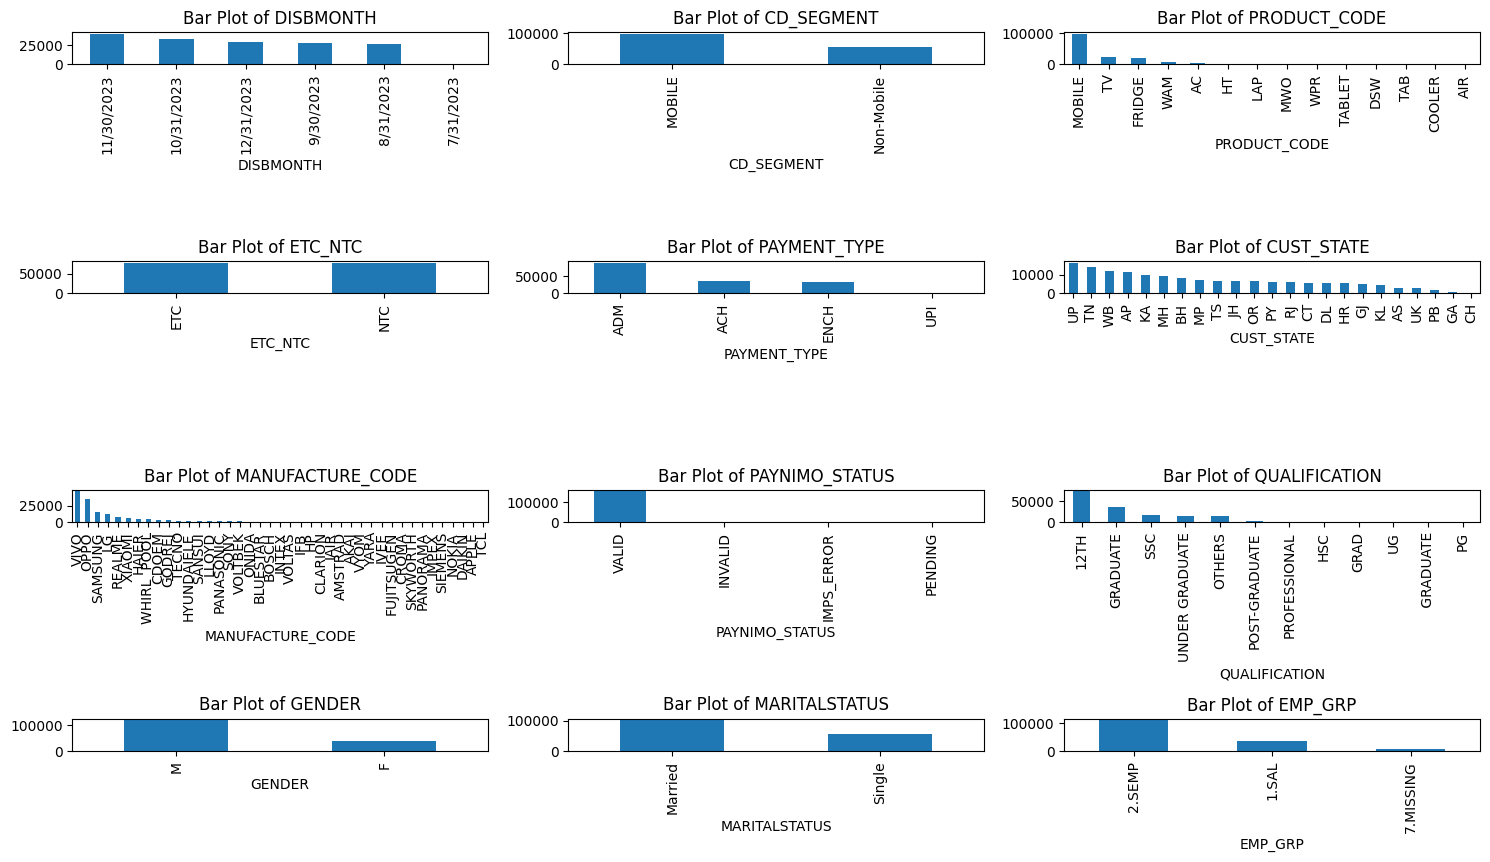

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
plt.tight_layout()
plt.show()

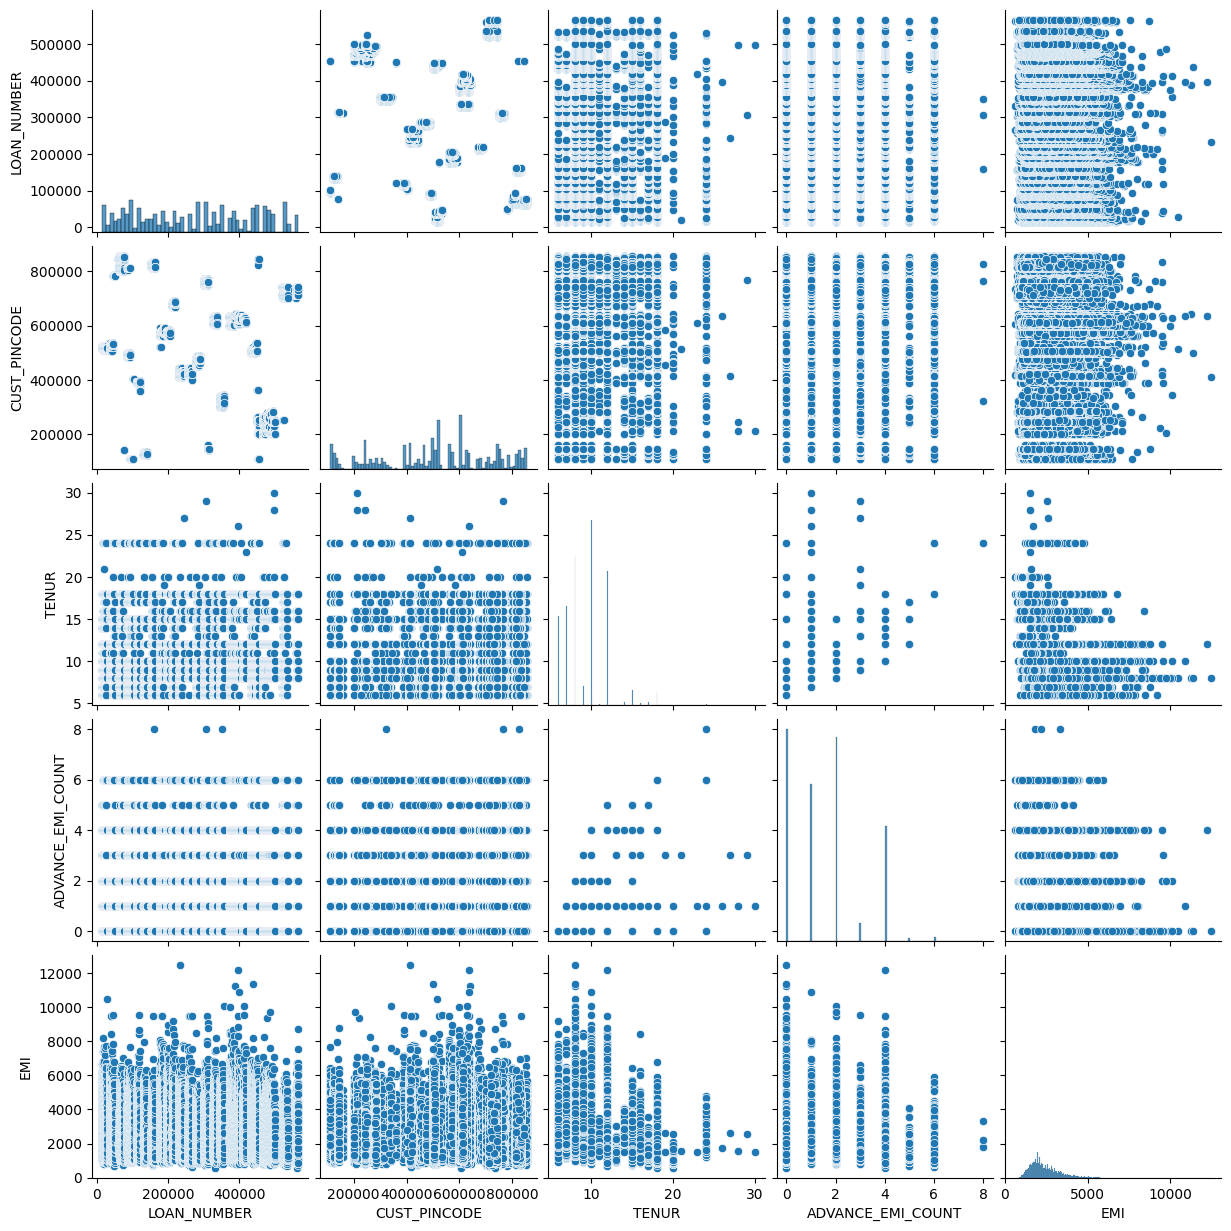

In [15]:
sns.pairplot(df[numerical_cols[:5]])  # Adjust as necessary to limit the number of features plotted
plt.show()

In [16]:
grouped = df.groupby('PAYMENT_TYPE')[['EMI', 'LTV']].mean()
print(grouped)

                      EMI        LTV
PAYMENT_TYPE                        
ACH           2445.950603  79.153872
ADM           2365.848152  78.346914
ENCH          2523.837971  79.621798
UPI           2630.185185  81.665926


In [17]:
cross_tab = pd.crosstab(df['GENDER'], df['EMP_GRP'])
print(cross_tab)

EMP_GRP  1.SAL  2.SEMP  7.MISSING
GENDER                           
F         9926   27095       1070
M        27815   84876       5127


In [19]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [21]:
X = df.drop('TARGET_VARIABLE', axis=1)
y = df['TARGET_VARIABLE']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = LogisticRegression(max_iter=500)  # Increase max_iter as needed
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [27]:
y_pred = model.predict(X_test)

In [28]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     44893
           1       0.19      0.00      0.00      1880

    accuracy                           0.96     46773
   macro avg       0.57      0.50      0.49     46773
weighted avg       0.93      0.96      0.94     46773



In [29]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[44880    13]
 [ 1877     3]]


In [30]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.71


In [32]:
y_prob = model.predict_proba(X_test)[:, 1]

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

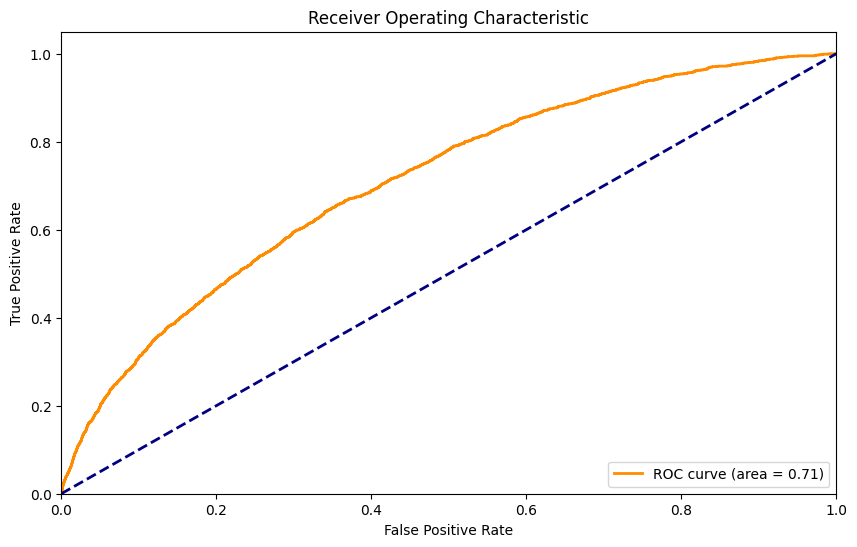

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

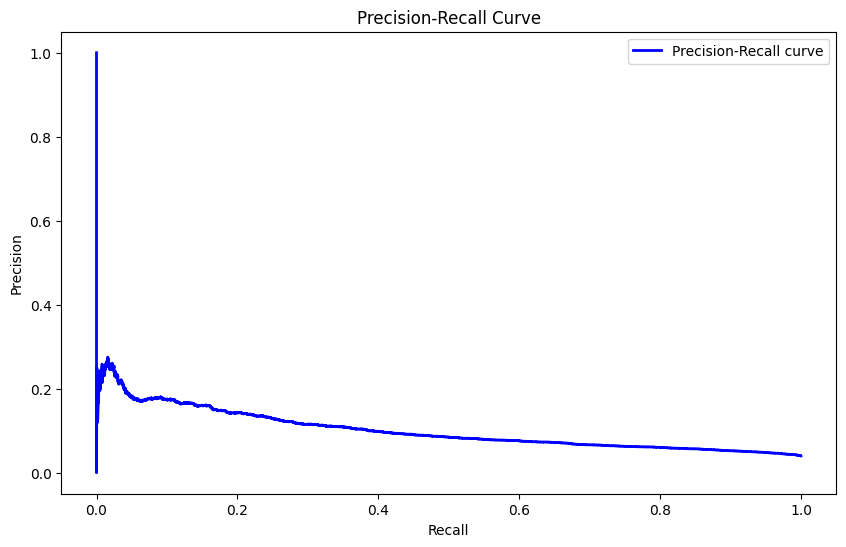

In [36]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()